In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

## Завантаження датасету

In [2]:
data_2d = pd.read_csv('D:\data_hwds\data_2d.csv')
mnist = pd.read_csv('D:\data_hwds\mnist.csv')

## Метод "ліктя" (elbow method)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

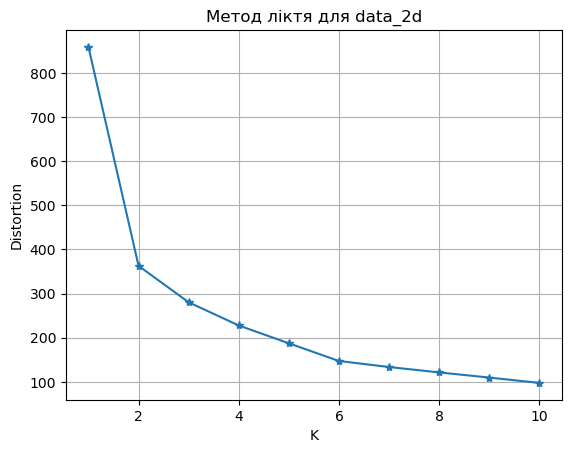

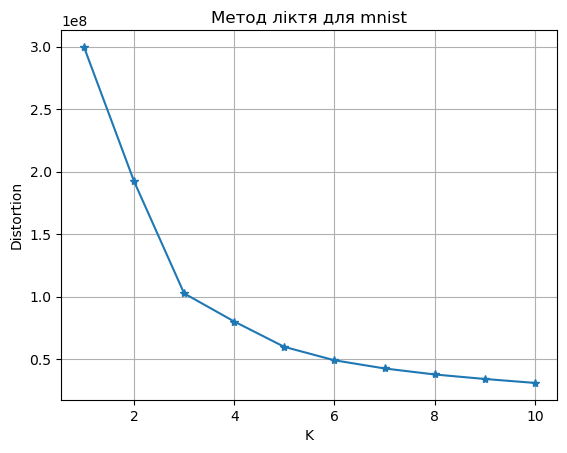

In [3]:
distances_sum_2d = []
distances_sum_mnist = []

pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist)

for k in range(1, 11):
    km_data_2d = KMeans(n_clusters=k, n_init='auto').fit(data_2d)
    distances_sum_2d.append(km_data_2d.inertia_)
    
    km_mnist = KMeans(n_clusters=k, n_init='auto').fit(mnist_pca)
    distances_sum_mnist.append(km_mnist.inertia_)

plt.grid()
plt.plot(range(1, 11), distances_sum_2d, marker='*')
plt.title('Метод ліктя для data_2d')
plt.ylabel('Distortion')
plt.xlabel('K')
plt.show()

plt.grid()
plt.plot(range(1, 11), distances_sum_mnist, marker='*')
plt.title('Метод ліктя для mnist')
plt.ylabel('Distortion')
plt.xlabel('K')
plt.show()


## Кластеризація даних з оптимальною кількістю кластерів

In [4]:
model_2d = KMeans(n_clusters=2, n_init='auto').fit(data_2d)
model_mnist = KMeans(n_clusters=3, n_init='auto').fit(mnist_pca)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Візуалізація

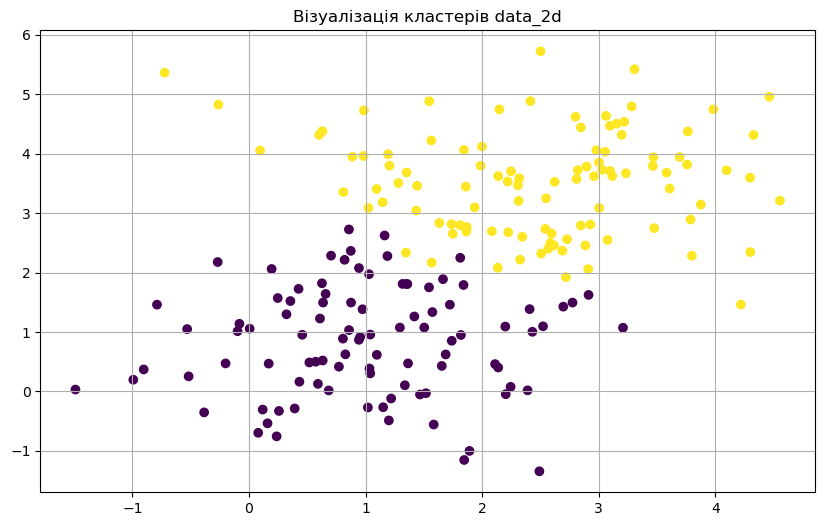

In [5]:
plt.figure(figsize=[10, 6])
plt.grid()
plt.scatter(data_2d['-7.687164597386728637e-01'], data_2d['4.608603078297135447e-01'], c=model_2d.labels_)
plt.title('Візуалізація кластерів data_2d')
plt.show()

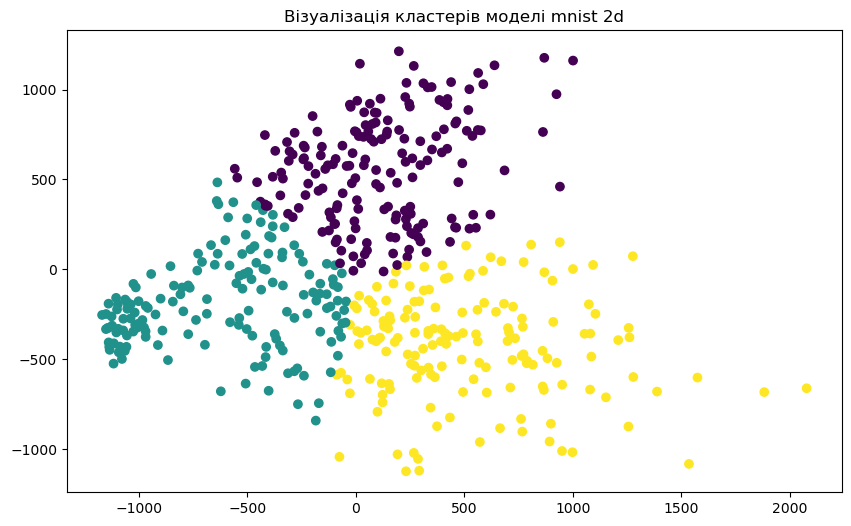

In [6]:
mnist_pca = pd.DataFrame(mnist_pca)

plt.figure(figsize=[10, 6])
plt.title('Візуалізація кластерів моделі mnist 2d')
plt.scatter(mnist_pca[0], mnist_pca[1], c=model_mnist.labels_)
plt.show()